<a href="https://colab.research.google.com/github/priyaregit/Rossmann-Sales-Prediction_Regression_Capstone-Project/blob/main/Rossmann_Sales_Prediction_Capstone_Project_2_Supriya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
# Loading Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

# Importing datetime module 
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

# Importing Matplotlib and Seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing warnings library to filter some warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading both the data sets from Google drive and storing it as dataframes: store and store2
store = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised Learning- Regression/Rossmann Stores Data.csv')
store2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised Learning- Regression/store.csv')

# Setting the option to display upto 50 columns of the dataframe
pd.set_option ("display.max_columns", 50)

Let us perform some basic checks on the data set such as:
*   Checking the shape (i.e. number of rows and columns) of the dataframes 
*   Checking for the various variables/features of each dataframe
*   Checking the data type of each of the features
*   Checking for the missing/null values

These checks would give us a baseline understanding of the available data.

In [ ]:
# Checking the shape of store and store2
store.shape , store2.shape

((1017209, 9), (1115, 10))

In [ ]:
# Checking the head (first 5 rows) of store
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Checking the tail of store
store.tail(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


We have data from 2013-01-01 to 2015-07-31

In [ ]:
# Checking for statistics of the numeric columns in store
store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


We can see that the maximum number of sales is 41551 and maximum number of customers is 7388

In [ ]:
# Checking the head of store2
store2.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
# Checking the tail of store2
store2.tail(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


We can merge both the data sets since they have common feature of 'Store'

In [ ]:
# Merging dataframe store2 with the dataframe store, based on the column 'Store' and through an outer join 

store = store.merge(store2, on ='Store', how = 'outer')

In [ ]:
# Checking for the shape of the new dataframe formed after merger
store.shape

(1017209, 18)

In the mergede dataframe , there are now 1,017,209 observations with 18 features.

In [ ]:
# Having a look at the first 5 rows/observations from the new dataframe
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
# Checking the last 5 rows
store.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# Checking for information such as missing values and data type of all the columns
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

<b> Filling the missing/null values

There are 6 columns with missing\null values. 

I will fill the null values in the columns: 'CompetitionDistance', 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with their respective median values because generally, stores do have a competitor store in their vicinity.


In [ ]:
# Filling the null values in 'CompetitionDistance', 'CompetitionOpenSinceMonth and 'CompetitionOpenSinceYear' with the respective median value
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace = True)
store.CompetitionOpenSinceMonth.fillna(store.CompetitionOpenSinceMonth.median(), inplace = True)
store.CompetitionOpenSinceYear.fillna(store.CompetitionOpenSinceYear.median(), inplace = True)

In [ ]:
# Checking for value count of 'Promo2'
store['Promo2'].value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

The count of observations from stores participating in Promo2 is the same as the number of non-null observations in the columns- 'Promo2SinceWeek',	'Promo2SinceYear' and	'PromoInterval'. This implies that the rest of the observations in the three columns, belong to those stores which are not running Promo2. Hence, i will fill all such null observations in these columns with 0.

In [ ]:
# Filling the null values in 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' with 0
store.Promo2SinceWeek.fillna(0, inplace = True)
store.Promo2SinceYear.fillna(0, inplace = True)
store.PromoInterval.fillna('0', inplace = True)

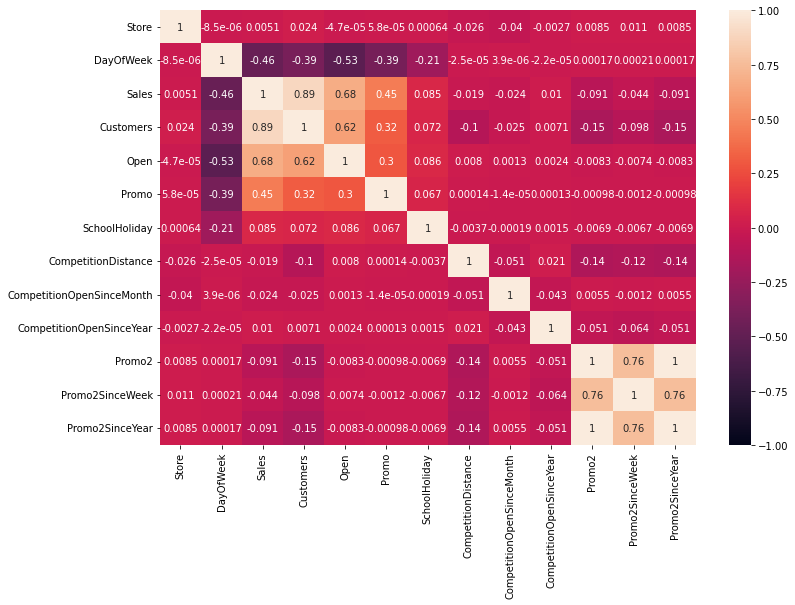

In [ ]:
# Setting the plot size
f, ax = plt.subplots(figsize=(12,8))

# Creating a heat map of 'store' to find correlation 
sns.heatmap(store.corr(), vmin=-1, annot = True)


From the above heat map, we can see that sales has a high correlation with customers and whether the store is open and participating in promotional offer.

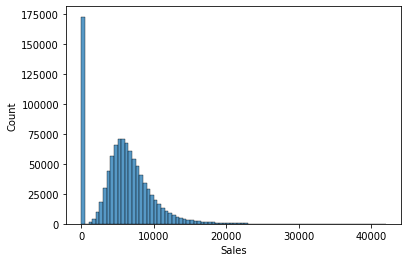

In [ ]:
sns.histplot(data = store, x = 'Sales', binwidth = 500)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

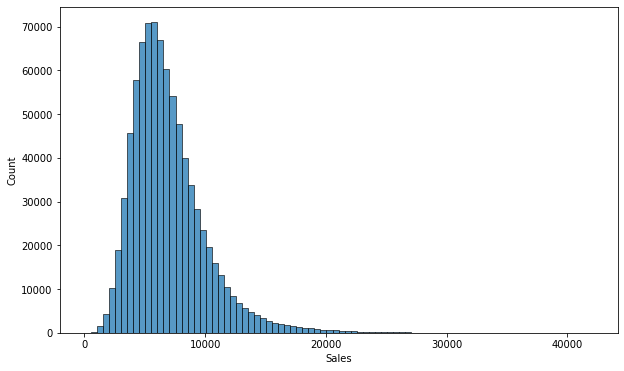

In [ ]:
temp_df = store[ store['Sales'] > 0 ]
sns.histplot(data = temp_df, x = 'Sales', binwidth = 500)


The above plot is highly skewed, implying there may be outliers.

In [ ]:
# Checking for the mean, median and maximum value of 'Sales'
store['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [ ]:
store['Sales'].quantile(0.99)

17160.0

In [ ]:
store [store['Sales']> 25000].shape

(758, 18)

In [ ]:
store [store['Sales']> 30000].shape

(153, 18)

We see that the maximum value of Sales is 41,551 while the average sales is 5,773. To prevent overfitting of the model, it would be better to remove the extreme outliers. Here, i would remove all those observations with sales value greater than 30,000.

In [ ]:
# Keeping only those observations with Sales < 30000

store = store [ store['Sales'] < 30000 ]

In [ ]:
store.shape

(1017056, 18)

In [ ]:
store [ (store['Open'] == 1) & (store['Sales'] == 0)].shape

(54, 18)

I will also remove all those observations where the store is open but sales is 0 as it could be a case of wrong entry of data 

In [ ]:
store.drop(store [(store['Open'] == 1) & (store['Sales'] == 0)].index, inplace = True)


In [ ]:
store.shape

(1017002, 18)

In [ ]:
# Checking the data type of all the columns
store.info()

Having handled the null values, we now have to convert the data type of a few features in order to build a sales prediction model.

I will first convert the 'Date' column from 'object' data type to date-time format

In [ ]:
# Converting data type of the column 'Date' from object to datetime
store['Date'] =  pd.to_datetime(store['Date'], format="%Y-%m-%d")

# Creating four new columns to show the date in the form of year, month, day and week number separately
store['year'] = store['Date'].dt.year
store['month'] = store['Date'].dt.month
store['day'] = store['Date'].dt.day
store['week_number'] = store['Date'].dt.week

In [ ]:
avgsales = store.groupby(['month'], as_index = False).agg({'Sales':'mean'})
avgsales

,month,Sales
0,1,5465.395529
1,2,5645.253150
2,3,5784.578871
3,4,5738.866916
4,5,5489.639973
5,6,5760.964375
6,7,6064.915711
7,8,5693.016554
8,9,5570.246033
9,10,5537.037419


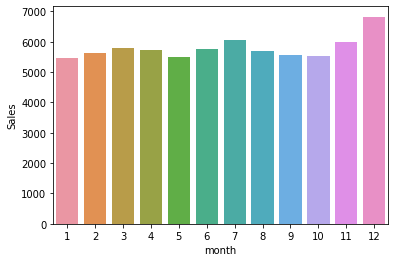

In [ ]:
#avgsales    =  store.groupby('Date')["Sales"].mean()

sns.barplot(x="month" ,y = "Sales" , data = avgsales)
#sns.lineplot(x="Date" ,y = "Sales" , data = store, aspect=2,size=12)

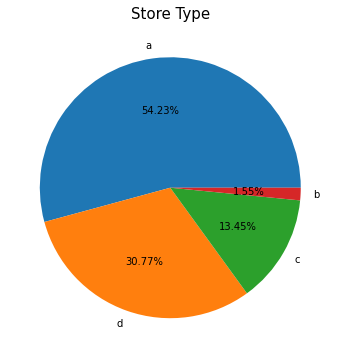

In [ ]:
# Plotting a Pie Chart to visualize the number of stores by type
plt.pie(store['StoreType'].value_counts(), labels = store['StoreType'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Store Type", fontsize = 15)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

Text(0.5, 1.0, 'Sales based on Store type')

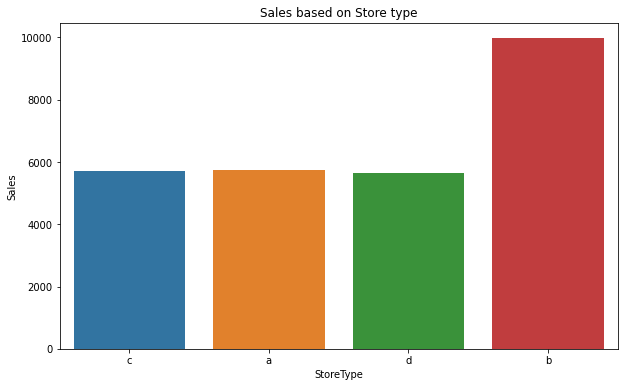

In [ ]:
# Barplot to check Sales according to Store type
sns.barplot(x ='StoreType', y ='Sales', data = store, ci = None)
plt.title('Sales based on Store type')

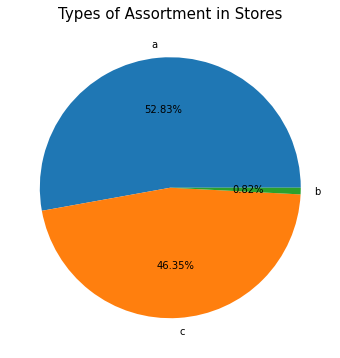

In [ ]:
# Plotting a Pie Chart to visualize the number of stores by assortment
plt.pie(store['Assortment'].value_counts(), labels = store['Assortment'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Types of Assortment in Stores", fontsize = 15)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

Text(0.5, 1.0, 'Assortment vs Sales')

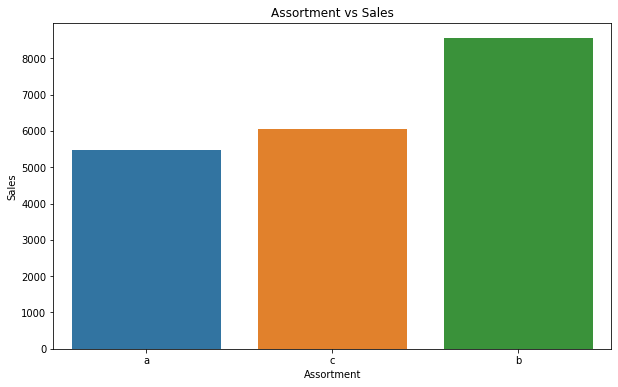

In [ ]:
# Barplot to check Sales according to Assortments
sns.barplot(x ='Assortment', y ='Sales', data = store, ci = None)
plt.title('Assortment vs Sales')

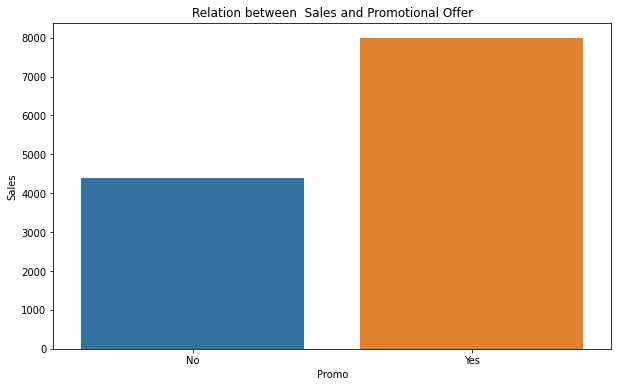

In [ ]:
# Barplot to check for the effect of Promo on Sales
sns.barplot(data = store, x = 'Promo', y = 'Sales', ci = None)

# Giving a title to the plot
plt.title("Relation between  Sales and Promotional Offer")
plt.xticks([0,1], labels = ['No', 'Yes'])

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


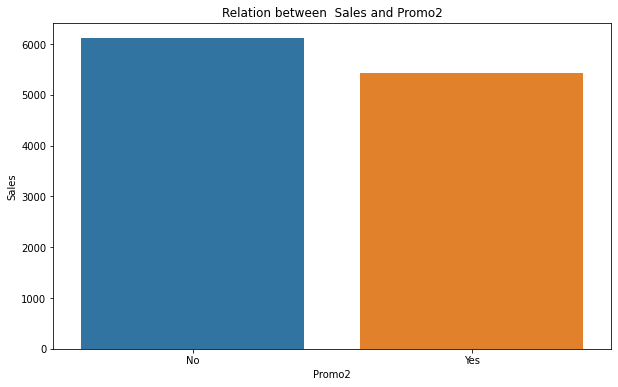

In [ ]:
# Barplot to check for the effect of Promo2 on Sales
sns.barplot(data = store, x = 'Promo2', y = 'Sales', ci = None)

# Giving a title to the plot
plt.title("Relation between  Sales and Promo2")
plt.xticks([0,1], labels = ['No', 'Yes'])

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)


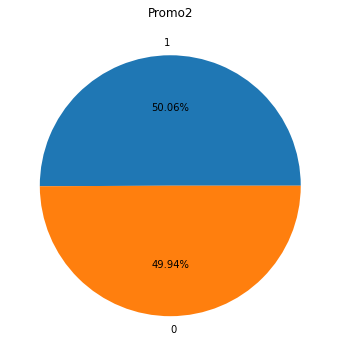

In [ ]:
# Plotting a Pie Chart to visualize the number of stores that are running Promo2
plt.pie(store['Promo2'].value_counts(), labels = store['Promo2'].value_counts().index, autopct = "%.02f%%")

# Giving a title to the plot
plt.title("Promo2")

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

Looks like Promo2 does not have much of an effect on sales

Let us check the sales based on the store type, presence of promotional offer and month.

In [ ]:
temp_df1 = store.groupby(['month','StoreType','Promo'])['Sales'].mean().reset_index()
temp_df1

,month,StoreType,Promo,Sales
0,1,a,0,4067.882457
1,1,a,1,7711.199364
2,1,b,0,8281.111562
3,1,b,1,10370.114286
4,1,c,0,4227.936393
...,...,...,...,...
91,12,b,1,13593.297872
92,12,c,0,5341.134245
93,12,c,1,10662.879035
94,12,d,0,4971.875407


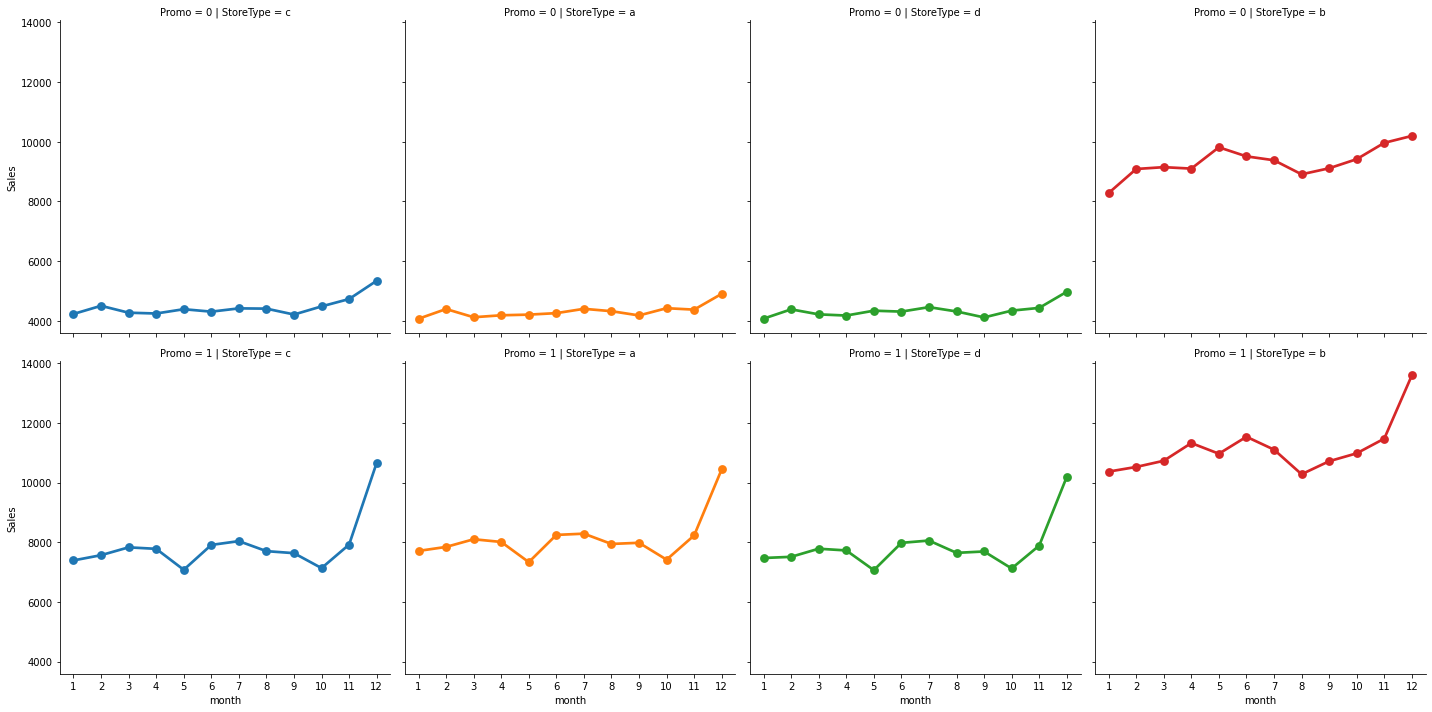

In [ ]:
sns.factorplot(x ='month', y ='Sales', data = store, row ='Promo', col ='StoreType', hue ='StoreType', ci = None)


The presence of the promo positively affects the sales in the stores.

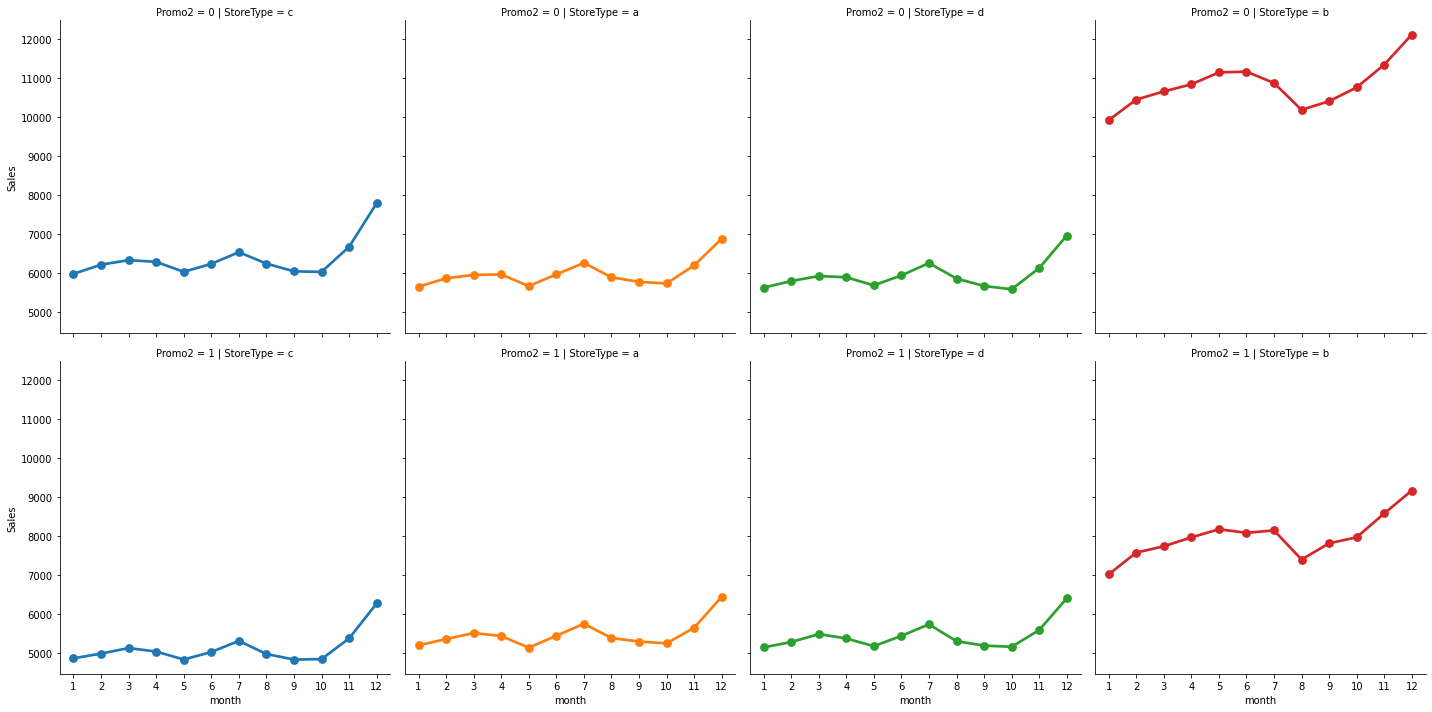

In [ ]:
sns.factorplot(x ='month', y ='Sales', data = store, row ='Promo2', col ='StoreType', hue ='StoreType', ci = None)

Promo2 doesnot have a very positive relationship with sales.

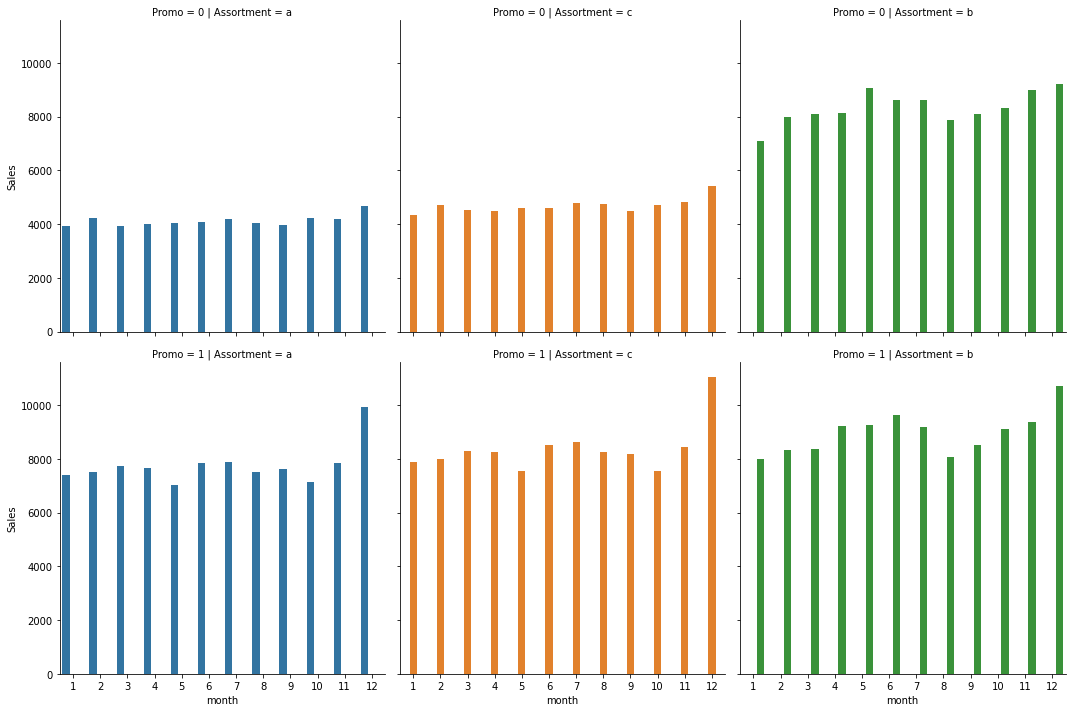

In [ ]:
sns.factorplot(x ='month', y ='Sales', data = store, row ='Promo', col ='Assortment', hue ='Assortment', kind = 'bar', ci = None)

The presence of promotional offer seems to have a lot of impact on sales if we differentiate according to assortment

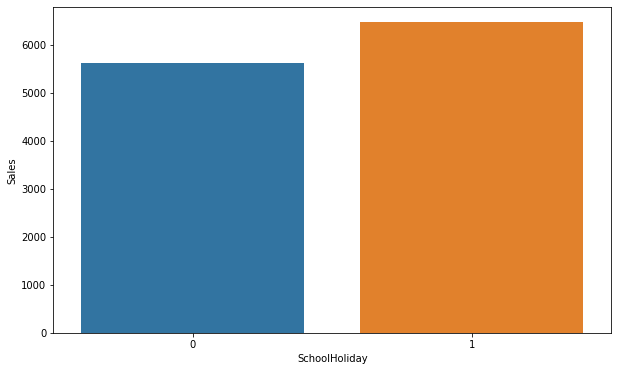

In [ ]:
sns.barplot(x ='SchoolHoliday', y ='Sales', data = store, ci = None)

# Setting the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (10, 6)

There is a small increase in average sales when there is a School holiday.

In [ ]:
# Checking for unique values in StateHoliday
store['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
# Mapping the value of '0' to state holidays 0. This is done to remove differentiation between 0 and '0'

store['StateHoliday'] = ['0' if i == 0 else i for i in store['StateHoliday']]


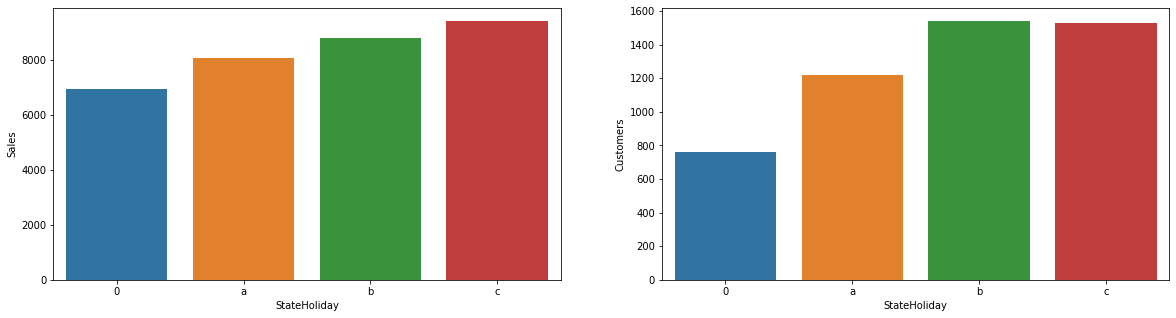

In [ ]:
# Setting axes to the subplots
fig , (ax1,ax2) = plt.subplots(nrows= 1, ncols = 2, figsize = (20,5))

sns.barplot(x ='StateHoliday', y ='Sales', data = store[store['Open'] != 0], ax = ax1, ci = None)
sns.barplot(x ='StateHoliday', y ='Customers', data = store[store['Open'] != 0], ax = ax2, ci = None)

plt.rcParams.update()


If the store is open, then there are higher number on sales on Christmas and Easter.
There is a two fold increase in the number of customers on christmas and easter when compared to a normal day.

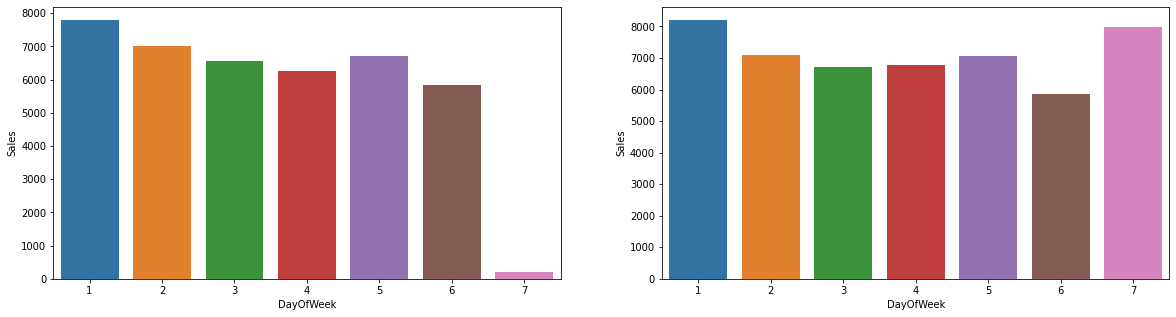

In [ ]:
# Setting axes to the subplots
fig , (ax1,ax2) = plt.subplots(nrows= 1, ncols = 2, figsize = (20,5))

sns.barplot(x ='DayOfWeek', y ='Sales', data = store, ax = ax1, ci =None)
sns.barplot(x ='DayOfWeek', y ='Sales', data = store[ store['Open'] != 0], ax = ax2, ci = None)

plt.rcParams.update()

Next, I create a new column 'CompetitionOpen' to calculate the number of months since the nearest competitor store has opened

In [ ]:
# Creating a column  'CompetitionOpen' and assigning the value of 0 to all the observations
store['CompetitionOpen'] = 0

# For all the non-zero observations of 'CompetitionOpenSinceYear', 'CompetitionOpen' takes the value of the total period for which the competitor existed
store['CompetitionOpen'] = store['CompetitionOpen'].where(store['CompetitionOpenSinceYear'] == 0, 
                                                          other =(12 * (store['year'] - store['CompetitionOpenSinceYear']) + 
                                                                  (store['month'] - store['CompetitionOpenSinceMonth'])))

# All the negative values of CompetitionOpen are set to 0
store['CompetitionOpen'] = store['CompetitionOpen'].where(store['CompetitionOpen'] > 0, other = 0)


Similarly, I create a new column 'Promo2open' to calculate the number of 
months since the time the store has begun participating in Promo2.

In [ ]:
# Creating a column  'Promo2open' and assigning the value of 0 to all the observations
store['Promo2open'] = 0

# For all the non-zero observations of 'Promo2SinceYear', 'Promo2open' takes the value of the total period for which the store has been running Promo2
store['Promo2open'] = store['Promo2open'].where(store['Promo2SinceYear'] == 0, 
                                                other = (12 * (store['year'] - store['Promo2SinceYear']) + 
                                                         (store['week_number'] - store['Promo2SinceWeek'])/4))

# All the negative values of Promo2open are set to 0
store['Promo2open'] = store['Promo2open'].where(store['Promo2open'] > 0, other = 0)


In [ ]:
store['PromoInterval'].unique()

array(['0', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
# Defining a function: 'check_promo_month' to check if Promo2 is running in current month
def check_promo_month(each):

    # Creating a dictionary of months 
    month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        #splitting the components of PromoInterval that are separated by ','
        promo_months = (each['PromoInterval']).split(',') 
        
        # If the current month is present in promo_months, return 1, else return 0
        if each['Promo2open'] and month_dict[each['month']] in promo_months: 
            return 1
        else:
            return 0
    
    # If there is an exception, return 0
    except Exception:
        return 0


In [ ]:
# Creating a new categorical column: 'IsPromo2Month' and applying the function: 'check_promo_month' to each of the rows
# 'IsPromo2Month' is populated as 1 only if the store is participating in promo2 (indicated by product with Promo2)

store['IsPromo2Month'] = store.apply(check_promo_month, axis=1) * store['Promo2']

In [ ]:
store.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,week_number,CompetitionOpen,Promo2open,IsPromo2Month
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,5,1,29,6.75,0
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,4,1,29,6.75,0
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,3,1,29,6.75,0
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2,1,29,6.75,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,8.0,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,1,29,6.75,0


In [ ]:
df =  store.copy()

In [ ]:
df.drop(columns = ['Store','Date','Customers','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek',
                   'Promo2SinceYear','PromoInterval','year','week_number'], inplace = True)	

In [ ]:
df.shape

(1017002, 15)

In [ ]:
df.head(2)

,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,month,day,CompetitionOpen,Promo2open,IsPromo2Month
0,5,5263,1,1,0,1,c,a,1270.0,0,7,31,82,0.0,0
1,4,5020,1,1,0,1,c,a,1270.0,0,7,30,82,0.0,0


Next, We need to encode 'StateHoliday', 'StoreType' and 'Assortment' as they are of object data type.

In [ ]:
# Doing a one hot encoding of the categorical columns

df = pd.get_dummies(df, columns = ['StateHoliday','StoreType','Assortment'])

In [ ]:
df.head(2)

,DayOfWeek,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,month,day,CompetitionOpen,Promo2open,IsPromo2Month,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,5263,1,1,1,1270.0,0,7,31,82,0.0,0,1,0,0,0,0,0,1,0,1,0,0
1,4,5020,1,1,1,1270.0,0,7,30,82,0.0,0,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
df1 = df.copy()

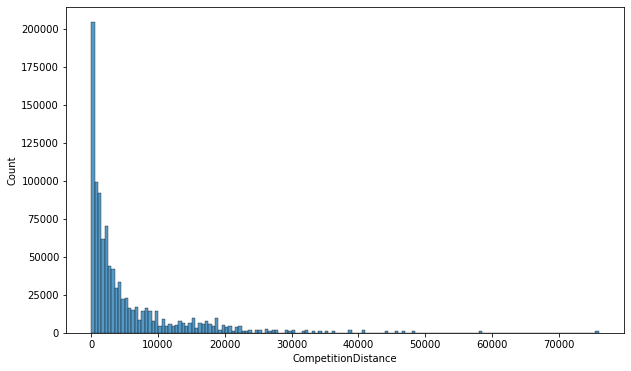

In [ ]:

sns.histplot(data = df1, x = 'CompetitionDistance', binwidth = 500)

In [ ]:
df['CompetitionDistance'].describe()

count    1.017002e+06
mean     5.422779e+03
std      7.707290e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.330000e+03
75%      6.880000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64

In [ ]:
df['CompetitionDistance'].quantile(0.9)

15710.0

In [ ]:
df1['ln_CompetitionDistance'] = df1['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)

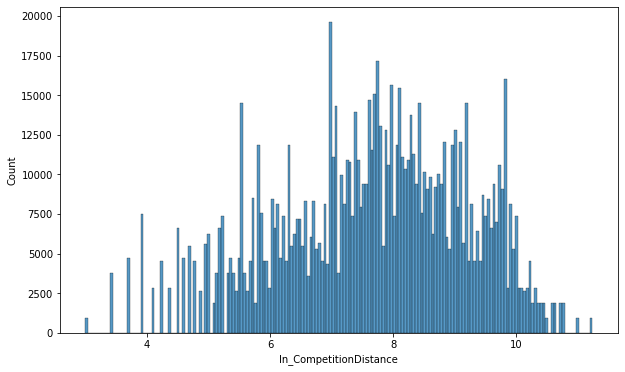

In [ ]:
sns.histplot(data = df1, x = 'ln_CompetitionDistance')

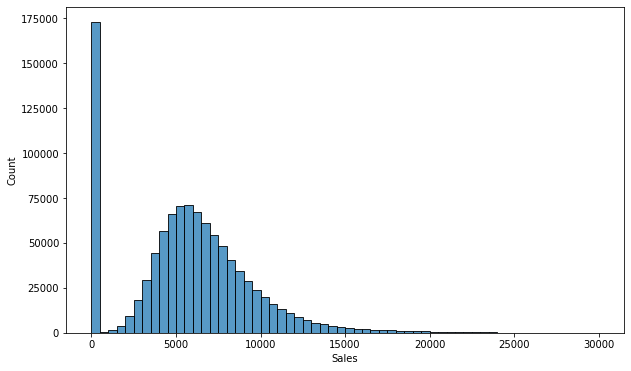

In [ ]:
sns.histplot(data = df1, x = 'Sales', binwidth = 500)

In [ ]:
df1['ln_Sales'] = df1['Sales'].map(lambda x : np.log(x) if x != 0 else 0)


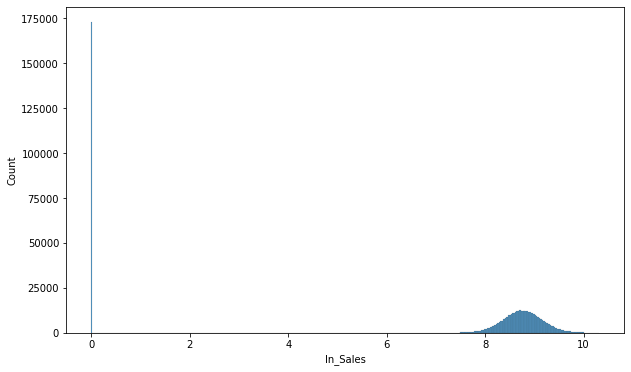

In [ ]:

sns.histplot(data = df1, x = 'ln_Sales')

In [ ]:
df1['ln_Sales'].describe()

count    1.017002e+06
mean     7.269166e+00
std      3.311653e+00
min      0.000000e+00
25%      8.223359e+00
50%      8.655911e+00
75%      8.968906e+00
max      1.030879e+01
Name: ln_Sales, dtype: float64

In [ ]:
df1['ln_CompetitionDistance'].describe()

count    1.017002e+06
mean     7.642685e+00
std      1.559148e+00
min      2.995732e+00
25%      6.565265e+00
50%      7.753624e+00
75%      8.836374e+00
max      1.123664e+01
Name: ln_CompetitionDistance, dtype: float64

In [ ]:
df1.head(2)

,DayOfWeek,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,month,day,CompetitionOpen,Promo2open,IsPromo2Month,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,ln_CompetitionDistance,ln_Sales
0,5,5263,1,1,1,1270.0,0,7,31,82,0.0,0,1,0,0,0,0,0,1,0,1,0,0,7.146772,8.568456
1,4,5020,1,1,1,1270.0,0,7,30,82,0.0,0,1,0,0,0,0,0,1,0,1,0,0,7.146772,8.521185


In [ ]:
df1.shape

(1017002, 25)

In [ ]:
df1.drop(columns=['Sales','CompetitionDistance'], inplace = True)

In [ ]:
df1.head(2)

,DayOfWeek,Open,Promo,SchoolHoliday,Promo2,month,day,CompetitionOpen,Promo2open,IsPromo2Month,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,ln_CompetitionDistance,ln_Sales
0,5,1,1,1,0,7,31,82,0.0,0,1,0,0,0,0,0,1,0,1,0,0,7.146772,8.568456
1,4,1,1,1,0,7,30,82,0.0,0,1,0,0,0,0,0,1,0,1,0,0,7.146772,8.521185


In [ ]:
df1['Promo2open'].describe()

count    1.017002e+06
mean     1.311299e+01
std      1.900834e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500000e+01
max      7.200000e+01
Name: Promo2open, dtype: float64

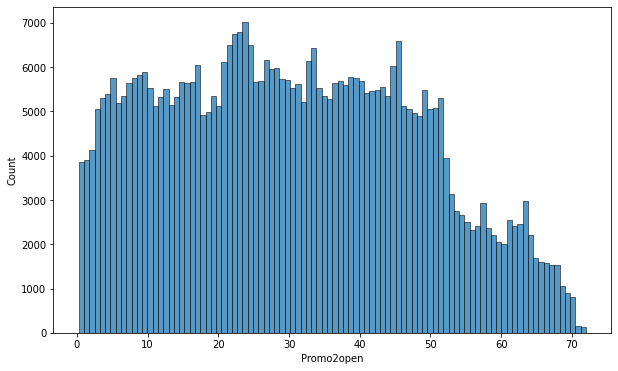

In [ ]:
sns.histplot(data = df1[df1['Promo2open'] >0], x = 'Promo2open')

In [ ]:
df1['ln_Promo2Open'] = df1['Promo2open'].map(lambda x : np.log(x) if x != 0 else 0)

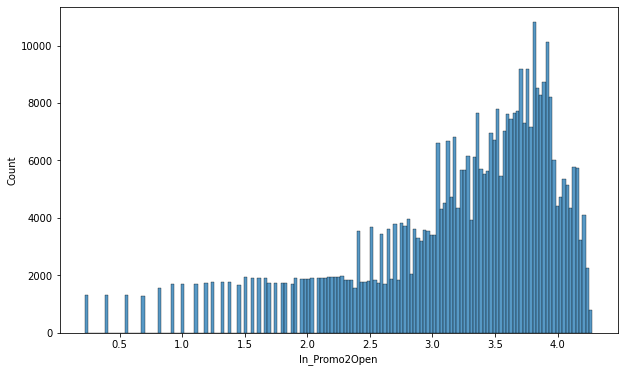

In [ ]:
sns.histplot( data = df1[df1['ln_Promo2Open'] > 0], x = 'ln_Promo2Open')

In [ ]:
df1.Promo2open.quantile(.95)

52.75

In [ ]:
df1['CompetitionOpen'].describe()

count    1.017002e+06
mean     5.597803e+01
std      5.950710e+01
min      0.000000e+00
25%      2.900000e+01
50%      4.600000e+01
75%      7.300000e+01
max      1.386000e+03
Name: CompetitionOpen, dtype: float64

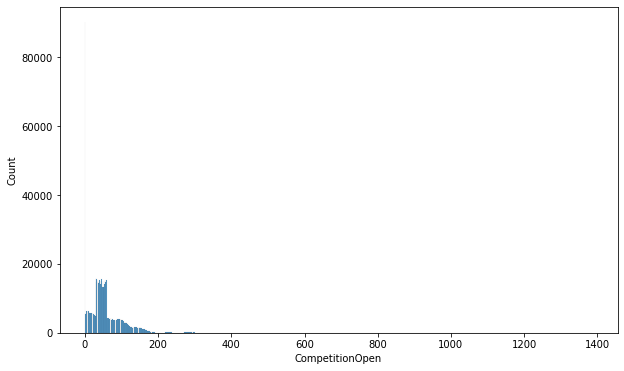

In [ ]:
sns.histplot( data = df1, x = 'CompetitionOpen')

In [ ]:
df1['ln_CompetitionOpen'] = df1['CompetitionOpen'].map(lambda x : np.log(x) if x != 0 else 0)

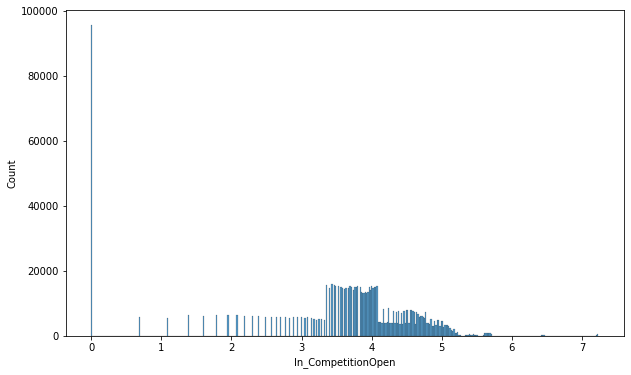

In [ ]:
sns.histplot( data = df1, x = 'ln_CompetitionOpen')

In [ ]:
df1.drop(columns=['Promo2open','CompetitionOpen'], inplace = True)

In [ ]:
df1.head(2)

,DayOfWeek,Open,Promo,SchoolHoliday,Promo2,month,day,IsPromo2Month,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,ln_CompetitionDistance,ln_Sales,ln_Promo2Open,ln_CompetitionOpen
0,5,1,1,1,0,7,31,0,1,0,0,0,0,0,1,0,1,0,0,7.146772,8.568456,0.0,4.406719
1,4,1,1,1,0,7,30,0,1,0,0,0,0,0,1,0,1,0,0,7.146772,8.521185,0.0,4.406719


In [ ]:
df2 = df1.copy()

In [ ]:
df1 = df2.copy()

In [ ]:
df1.head()

,DayOfWeek,Open,Promo,SchoolHoliday,Promo2,month,day,IsPromo2Month,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,ln_CompetitionDistance,ln_Sales,ln_Promo2Open,ln_CompetitionOpen
0,5,1,1,1,0,7,31,0,1,0,0,0,0,0,1,0,1,0,0,7.146772,8.568456,0.0,4.406719
1,4,1,1,1,0,7,30,0,1,0,0,0,0,0,1,0,1,0,0,7.146772,8.521185,0.0,4.406719
2,3,1,1,1,0,7,29,0,1,0,0,0,0,0,1,0,1,0,0,7.146772,8.472614,0.0,4.406719
3,2,1,1,1,0,7,28,0,1,0,0,0,0,0,1,0,1,0,0,7.146772,8.519391,0.0,4.406719
4,1,1,1,1,0,7,27,0,1,0,0,0,0,0,1,0,1,0,0,7.146772,8.716372,0.0,4.406719


In [ ]:
numeric = df1[['DayOfWeek','month','day','ln_CompetitionDistance','ln_Sales','ln_Promo2Open','ln_CompetitionOpen']]
numeric.shape

(1017002, 7)

In [ ]:
numeric.columns

Index(['DayOfWeek', 'month', 'day', 'ln_CompetitionDistance', 'ln_Sales',
       'ln_Promo2Open', 'ln_CompetitionOpen'],
      dtype='object')

In [ ]:
new_df = MinMaxScaler().fit_transform(numeric)
new_df = pd.DataFrame(new_df, columns = 'scaled_' + numeric.columns)
new_df.head(2)

,scaled_DayOfWeek,scaled_month,scaled_day,scaled_ln_CompetitionDistance,scaled_ln_Sales,scaled_ln_Promo2Open,scaled_ln_CompetitionOpen
0,0.666667,0.545455,1.000000,0.503711,0.831180,0.2448,0.609153
1,0.500000,0.545455,0.966667,0.503711,0.826594,0.2448,0.609153


In [ ]:
df2 = pd.concat([df1,new_df], axis=1)
df2.drop(columns = ['DayOfWeek','month','day','ln_CompetitionDistance','ln_Sales','ln_Promo2Open','ln_CompetitionOpen'], inplace = True)

In [ ]:
df2.head(2)

,Open,Promo,SchoolHoliday,Promo2,IsPromo2Month,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,scaled_DayOfWeek,scaled_month,scaled_day,scaled_ln_CompetitionDistance,scaled_ln_Sales,scaled_ln_Promo2Open,scaled_ln_CompetitionOpen
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,0.545455,1.000000,0.503711,0.831180,0.2448,0.609153
1,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.500000,0.545455,0.966667,0.503711,0.826594,0.2448,0.609153


In [ ]:
final_df = df2[df2['Open'] == 1]


Sales is possible only if the store is open. So for training the model, i will be considering all those observations in which the store is open.

In [ ]:
final_df.drop(['Open'], axis = 1, inplace = True)

In [ ]:
final_df.head(2)


,Promo,SchoolHoliday,Promo2,IsPromo2Month,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,scaled_DayOfWeek,scaled_month,scaled_day,scaled_ln_CompetitionDistance,scaled_ln_Sales,scaled_ln_Promo2Open,scaled_ln_CompetitionOpen
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,0.545455,1.000000,0.503711,0.831180,0.2448,0.609153
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.500000,0.545455,0.966667,0.503711,0.826594,0.2448,0.609153
